In [24]:
import cv2
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


(100, 100)


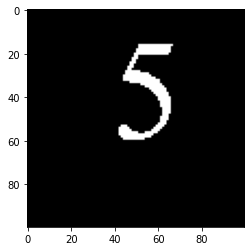

(126, 126)


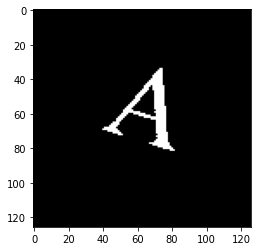

(100, 100)


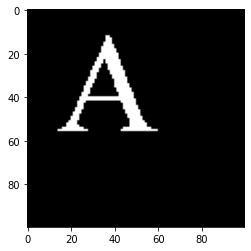

(100, 100)


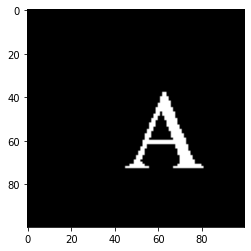

(100, 100)


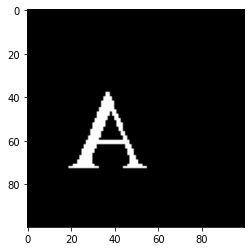

(100, 100)


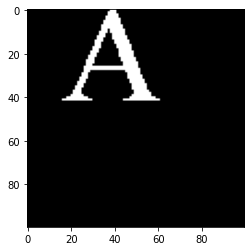

(100, 100)


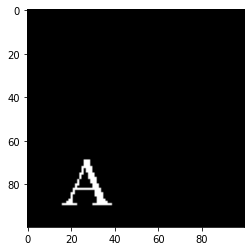

In [74]:
# Define the directory path
directory = "objects_moments"

# Get all image filenames in the directory
filenames = [img for img in os.listdir(directory) if img.endswith(".jpg") or img.endswith(".png")]

filenames.sort()
# Read the images using OpenCV
images = []
for filename in filenames:
    path = os.path.join(directory, filename)
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    print(image.shape)
    # Threshold image to convert it to binary
    _,im = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    images.append(im)
    plt.imshow(im,cmap = 'gray')
    plt.show()

In [75]:
# Calculate Moments
data = []
d = []
columns = ["Image", "H0", "H1", "H2", "H3", "H4", "H5", "H6" ]
c = 0
for im in images:
  print(c)
  moments = cv2.moments(im)
  # Calculate Hu Moments
  #d = [cv2.imread(os.path.join(directory, filenames[i]),0)]
  d = [os.path.join(directory, filenames[c])]
  c = c + 1
  huMoments = cv2.HuMoments(moments)
  for i in range(0,7):
    #print(huMoments[i])
    d.append(huMoments[i])
  data.append(d)

ddata = np.vstack(data)
# Create the dataframe
df = pd.DataFrame(ddata, columns=columns)

0
1
2
3
4
5
6


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [76]:
df.head(10)

,Image,H0,H1,H2,H3,H4,H5,H6
0,objects_moments/50.jpg,[0.0026049513239877605],[2.8945909209626795e-06],[5.776271226112988e-10],[5.769892481033537e-10],[3.235016319521174e-19],[7.024565051640338e-13],[7.938942310881115e-20]
1,objects_moments/50r.jpg,[0.001996571510613796],[1.9239356694616604e-07],[5.657699618525041e-09],[2.4878751268224434e-10],[6.810917167815483e-20],[5.022897197189354e-15],[2.8719800859359466e-19]
2,objects_moments/A0.jpg,[0.0019711635888352134],[1.5913932425091865e-07],[5.556455086190804e-09],[2.518528039697743e-10],[3.7363872777890874e-20],[1.8291086849813543e-14],[2.95581138945713e-19]
3,objects_moments/A1.jpg,[0.0018550155237481948],[1.8787854184464602e-07],[4.559401689009201e-09],[1.484995778375743e-10],[5.869329934177621e-20],[-1.3923044707727505e-14],[1.0717234512370819e-19]
4,objects_moments/A1m.jpg,[0.0018802271298525056],[1.859933957652002e-07],[4.8281127468869635e-09],[1.5260963269089599e-10],[7.839875650269074e-20],[-1.430137390027237e-14],[-1.0494698905550663e-19]
5,objects_moments/A2.jpg,[0.0019253824991099684],[1.3570030574301587e-07],[4.8970141085950595e-09],[2.833278198104373e-10],[5.2433130990544173e-20],[9.054290886916077e-15],[3.295886285330466e-19]
6,objects_moments/A3.jpg,[0.0021048358062712214],[2.0480333344608702e-07],[7.22788450781237e-09],[2.5436876916762425e-10],[3.123329719585118e-19],[-6.553043827218018e-14],[1.4631663230063614e-19]


### Note that hu[0] is not comparable in magnitude as hu[6]. We can use use a log transform given below to bring them in the same range

image.png

In [89]:
import math as m
data = []
d = []
columns = ["Image", "H0", "H1", "H2", "H3", "H4", "H5", "H6" ]
c = 0
for im in images:
  print(c)
  moments = cv2.moments(im)
  # Calculate Hu Moments
  #d = [cv2.imread(os.path.join(directory, filenames[i]),0)]
  d = [os.path.join(directory, filenames[c])]
  c = c + 1
  huMoments = cv2.HuMoments(moments)
  for i in range(0,7):
    huMoments[i] = -1* m.copysign(1.0, huMoments[i]) * m.log10(abs(huMoments[i]))
  for i in range(0,7):
    #print(huMoments[i])
    d.append(huMoments[i])
  data.append(d)

ddata = np.vstack(data)
# Create the dataframe
df = pd.DataFrame(ddata, columns=columns)

0
1
2
3
4
5
6


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


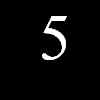

H0     [2.584200387497287]
H1     [5.538412804413907]
H2     [9.238352422564681]
H3      [9.23883227962224]
H4     [18.49012352412662]
H5    [12.153380561319029]
H6    [19.100237353888467]
Name: 0, dtype: object


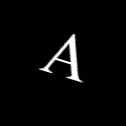

H0     [2.699715130193516]
H1    [6.7158094535377595]
H2     [8.247360114051181]
H3     [9.604171421848159]
H4    [19.166794401435112]
H5    [14.299045710383208]
H6    [18.541818575780056]
Name: 1, dtype: object


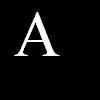

H0    [2.7052773316920056]
H1     [6.798222490404135]
H2     [8.255202191781146]
H3     [9.598853209619367]
H4    [19.427548115340805]
H5    [13.737760488134683]
H6     [18.52932328175602]
Name: 2, dtype: object


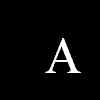

H0     [2.7316524516284666]
H1      [6.726122819104509]
H2       [8.34109214422374]
H3      [9.828274780980253]
H4      [19.23141147669101]
H5    [-13.856265782313567]
H6     [18.969917266038973]
Name: 3, dtype: object


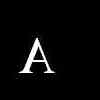

H0      [2.725789685159996]
H1      [6.730502476393115]
H2       [8.31622259673974]
H3      [9.816418052931134]
H4     [19.105690825686768]
H5    [-13.844622238853445]
H6    [-18.979030016875164]
Name: 4, dtype: object


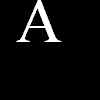

H0     [2.715482980050982]
H1     [6.867419173840962]
H2     [8.310068644751201]
H3     [9.547710780237844]
H4    [19.280394208063186]
H5    [14.043145557051593]
H6    [18.482027780744772]
Name: 5, dtype: object


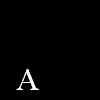

H0     [2.6767817768884594]
H1      [6.688662978919548]
H2      [8.140988795516268]
H3      [9.594536211462195]
H4     [18.505382166318057]
H5    [-13.183556927442108]
H6     [18.834706303363255]
Name: 6, dtype: object


In [90]:
from IPython.display import Image
from IPython.display import display
# Loop through the rows of the dataframe
for index, row in df.iterrows():
    # Display the image
    display(Image(row["Image"]))
    print(row[1:])

In [91]:
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >'

In [92]:
# Rendering the dataframe as HTML table
df.to_html(escape=False, formatters=dict(Image=path_to_image_html))

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Image</th>\n      <th>H0</th>\n      <th>H1</th>\n      <th>H2</th>\n      <th>H3</th>\n      <th>H4</th>\n      <th>H5</th>\n      <th>H6</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td><img src="objects_moments/50.jpg" width="100" ></td>\n      <td>[2.584200387497287]</td>\n      <td>[5.538412804413907]</td>\n      <td>[9.238352422564681]</td>\n      <td>[9.23883227962224]</td>\n      <td>[18.49012352412662]</td>\n      <td>[12.153380561319029]</td>\n      <td>[19.100237353888467]</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td><img src="objects_moments/50r.jpg" width="100" ></td>\n      <td>[2.699715130193516]</td>\n      <td>[6.7158094535377595]</td>\n      <td>[8.247360114051181]</td>\n      <td>[9.604171421848159]</td>\n      <td>[19.166794401435112]</td>\n      <td>[14.299045710383208]</td>\n      <td>[18.541818575780056]</td>\n  

In [93]:
from IPython.core.display import HTML, display
display(HTML(df.to_html('page.html',escape=False,formatters=dict(Image=path_to_image_html))))


# please download the generated html page with the directory of images to see results properly 

<IPython.core.display.HTML object>

### please download the generated html page with the directory of images to see results properly 